In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
def parse_line(line):
    line = re.sub(r'±|\n', '', line)
    return re.split(r'\s+', line)

In [3]:
def read_results():
    with open('jmh-results.txt','r') as f:
        lines = (parse_line(line) for line in f)
        header = next(lines)
        df = pd.DataFrame(lines, columns=header, )
    df[['Benchmark', 'Method']] = df.Benchmark.str.split('.', n=1, expand=True)
    df.Score = df.Score.astype(float)
    df.Error = df.Error.astype(float)
    df['Error%'] = df.Error * 100 / df.Score
    return df

results = read_results()
results

,Benchmark,(exponent),(n),Mode,Cnt,Score,Error,Units,Method,Error%
0,FibonacciBenchmark,N/A,10,thrpt,15,2.031906e+06,61963.903,ops/s,fast,3.049546
1,FibonacciBenchmark,N/A,100,thrpt,15,8.291059e+05,42809.302,ops/s,fast,5.163309
2,FibonacciBenchmark,N/A,1000,thrpt,15,3.143388e+05,11219.042,ops/s,fast,3.569092
3,FibonacciBenchmark,N/A,10000,thrpt,15,2.797877e+04,1058.518,ops/s,fast,3.783290
4,FibonacciBenchmark,N/A,10,thrpt,15,7.767480e+06,327983.389,ops/s,simple,4.222520
5,FibonacciBenchmark,N/A,100,thrpt,15,6.309666e+05,16850.376,ops/s,simple,2.670565
6,FibonacciBenchmark,N/A,1000,thrpt,15,2.618531e+04,4216.533,ops/s,simple,16.102669
7,FibonacciBenchmark,N/A,10000,thrpt,15,4.857550e+02,14.559,ops/s,simple,2.997190
8,FibonacciBenchmark,N/A,10,thrpt,15,2.291288e+06,86593.758,ops/s,simple2,3.779261
9,FibonacciBenchmark,N/A,100,thrpt,15,1.826508e+05,6257.970,ops/s,simple2,3.426194


In [4]:
def get_fibonacci_results(data):
    df = data.copy() # fuck SettingWithCopyWarning
    df = df[df.Benchmark == 'FibonacciBenchmark']
    df['n'] = df['(n)'].astype(int)
    return df[['Method', 'n', 'Score', 'Error', 'Error%']]

fib = get_fibonacci_results(results)
fib

,Method,n,Score,Error,Error%
0,fast,10,2031905.665,61963.903,3.049546
1,fast,100,829105.926,42809.302,5.163309
2,fast,1000,314338.832,11219.042,3.569092
3,fast,10000,27978.768,1058.518,3.783290
4,simple,10,7767479.899,327983.389,4.222520
5,simple,100,630966.624,16850.376,2.670565
6,simple,1000,26185.305,4216.533,16.102669
7,simple,10000,485.755,14.559,2.997190
8,simple2,10,2291288.296,86593.758,3.779261
9,simple2,100,182650.801,6257.970,3.426194


Text(0.5, 1.0, 'Fibonacci')

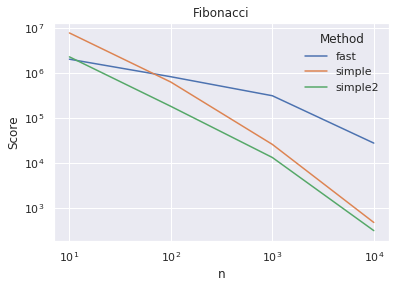

In [5]:
# Seaborn is easy and nice, but I don't know how to draw errors with it.
# So there are a lot of manual mechanics below.
g = sns.lineplot(x="n", y="Score", hue="Method", data=fib)
g.axes.set_xscale('log')
g.axes.set_yscale('log')
g.set_title('Fibonacci')

In [6]:
def plot_score(data, methods, xlabel):
    n = data.index
    scores = data.Score
    errs = data.Error
    colors = [plt.cm.rainbow(x) for x in np.linspace(0, 1, len(methods))]
    plt.figure(figsize=(15, 10), dpi=100)
    for i, method in enumerate(methods):
        score = scores[method]
        err = errs[method]
        color = colors[i]
        plt.plot(n, score, '-', color=color, label=method)
        plt.fill_between(n, score - err, score + err, color=color, alpha=0.2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(xlabel)
    plt.ylabel('ops/s')
    plt.legend(loc='lower left')

In [7]:
fib.Method.unique()

array(['fast', 'simple', 'simple2'], dtype=object)

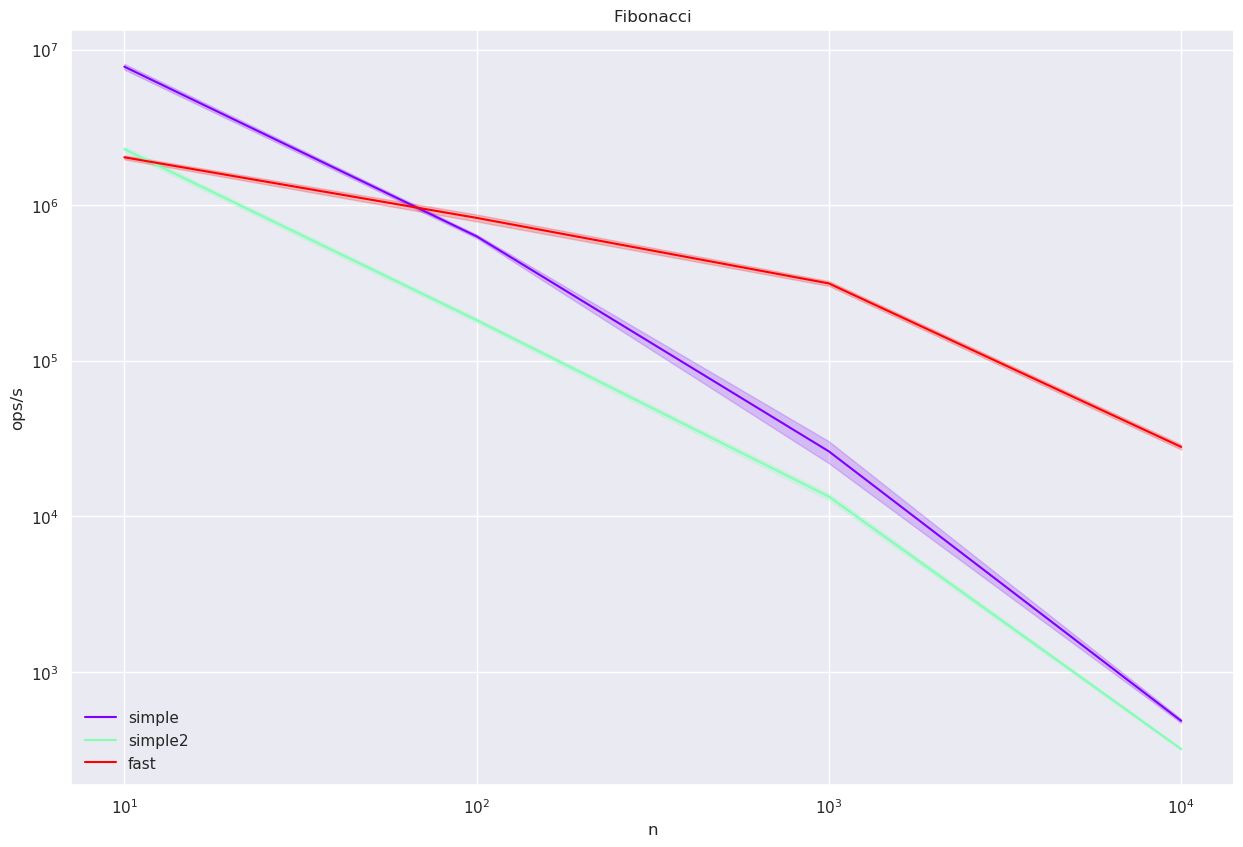

In [8]:
def plot_fib_score(data):
    data = data.pivot(index='n', columns='Method', values=['Score', 'Error'])
    plot_score(data, ['simple', 'simple2', 'fast'], 'n')
    plt.title('Fibonacci')

plot_fib_score(fib)

In [9]:
def get_power_results(data):
    df = data.copy() # fuck SettingWithCopyWarning
    df = df[df.Benchmark == 'PowerBenchmark']
    df['exponent'] = df['(exponent)'].astype(int)
    df = df[['Method', 'exponent', 'Score', 'Error', 'Error%']]
    return df

power = get_power_results(results)
power

,Method,exponent,Score,Error,Error%
12,fast,3,2.225904e+07,684701.481,3.076060
13,fast,10,1.484000e+07,956855.240,6.447812
14,fast,100,5.716120e+06,155912.919,2.727601
15,fast,1000,1.533683e+06,27815.144,1.813617
16,fast,10000,8.461656e+04,1497.069,1.769239
17,fast2,3,2.009381e+07,698242.534,3.474914
18,fast2,10,1.378799e+07,375131.647,2.720713
19,fast2,100,5.210801e+06,267590.529,5.135305
20,fast2,1000,1.429798e+06,36605.211,2.560166
21,fast2,10000,8.423767e+04,1355.753,1.609438


In [10]:
power.Method.unique()

array(['fast', 'fast2', 'fastRecursive', 'simple', 'simple2'],
      dtype=object)

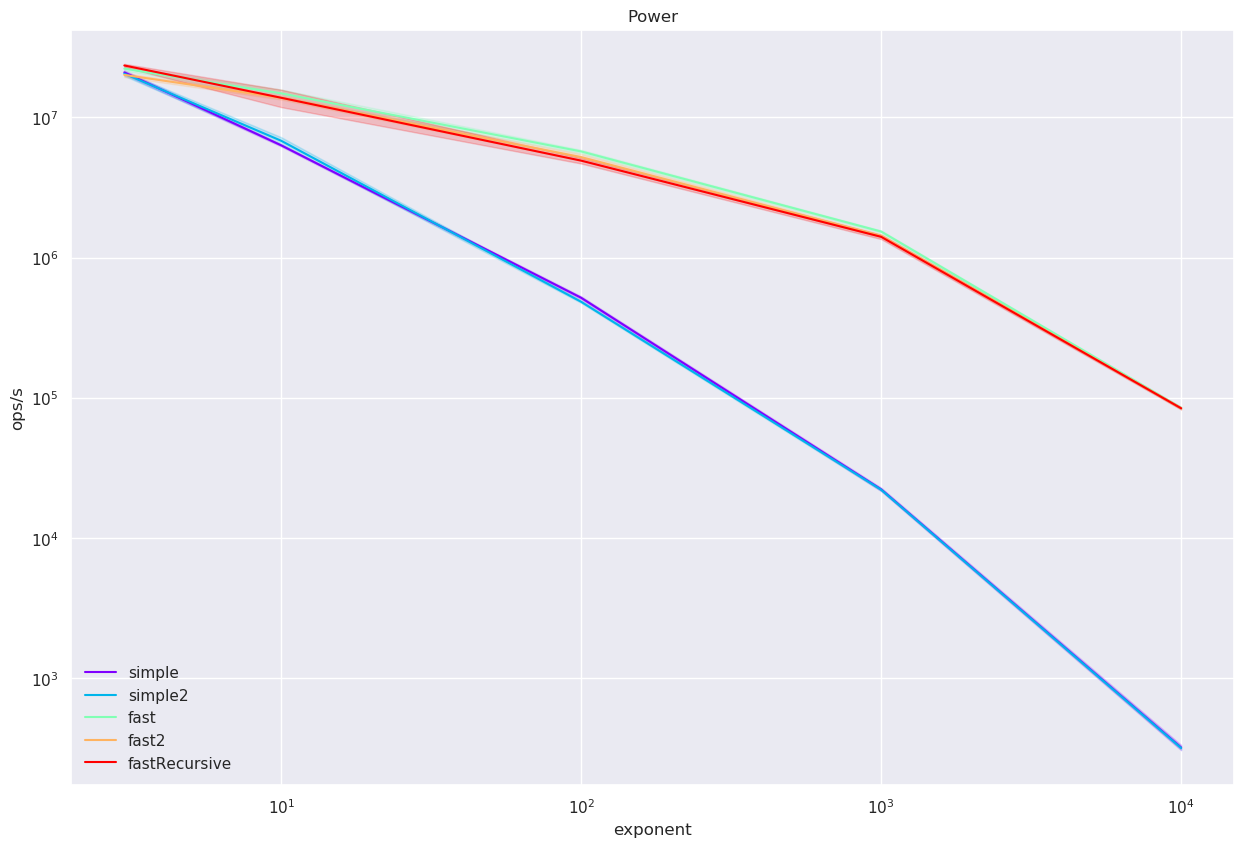

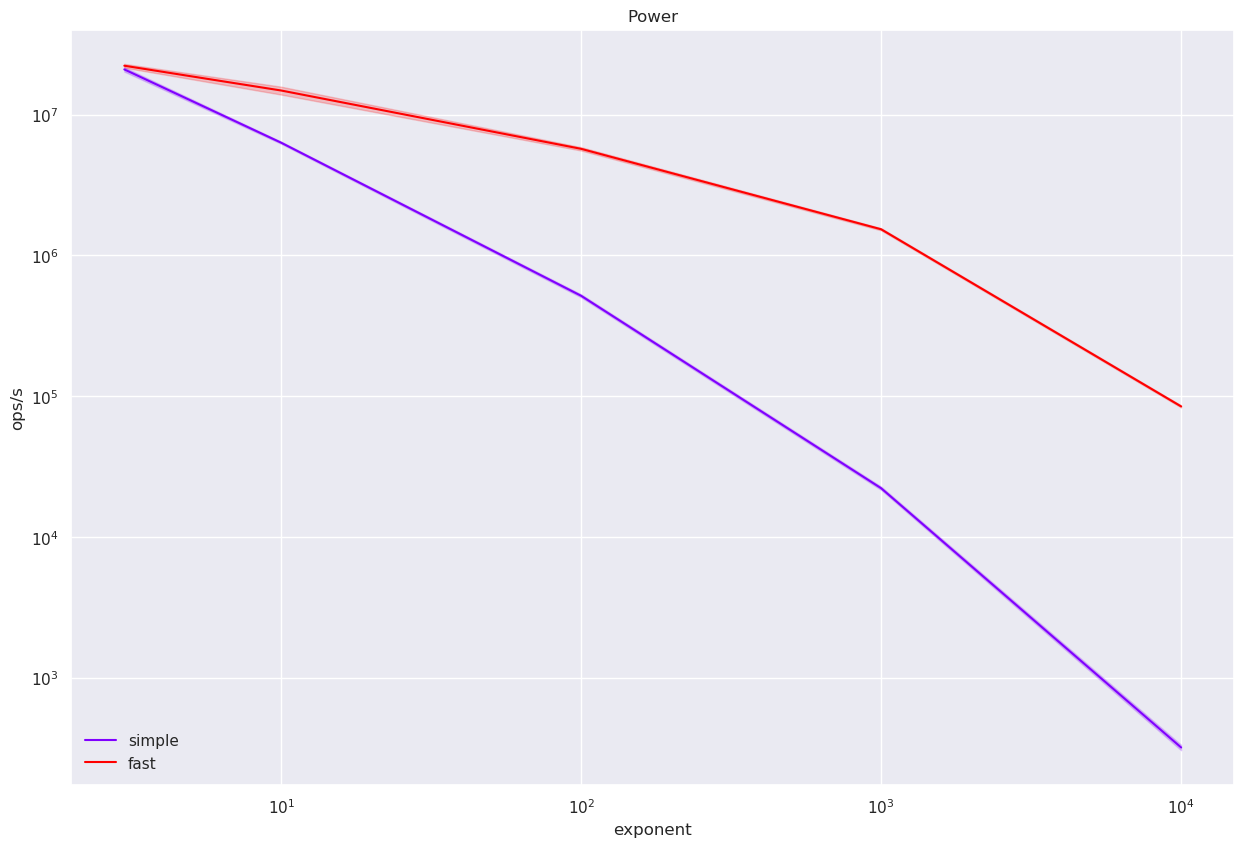

In [11]:
def plot_power_score(data, methods):
    data = data.pivot(index='exponent', columns='Method', values=['Score', 'Error'])
    plot_score(data, methods, 'exponent')
    plt.title('Power')

plot_power_score(power, ['simple', 'simple2', 'fast', 'fast2', 'fastRecursive'])
plot_power_score(power, ['simple', 'fast'])